## Seaborn을 이용한 히트맵 시각화 해보기
---
파이썬(Python)에는 맷플롯립(Matplotlib)이라는 괜찮은 시각화 패키지가 있습니다. 하지만, Matplotlib은 기본 배색이 별로라거나, 몇몇 그래프나 옵션을 이용하기 불편하다는 점이 있어서 별도의 패키지를 쓰는 경우가 많습니다.  
</p></br></br>


이번에는 그 중에서 씨본(Seaborn)이라는 패키지를 이용해 보려 합니다. 이 패키지는 정적 그래프를 그리는데는 부족함 없는 기능과, 제법 괜찮은 기본 컬러팔레트를 가지고 있어서 누구나 손쉽게 고급스러운 그래프를 그릴 수 있도록 해 줍니다. 그리고, Matplotlib과의 호환성이 좋은 편이라 코드를 섞어 써도 된다는 장점이 있답니다.  
</p></br></br>


이번에는 Seaborn을 이용해서 시각화를 하기 위해, Seaborn에서 기본 제공하는 샘플 데이터인 mpg를 이용해 보겠습니다. 해당 데이터는 미국, 유럽, 일본에서 제조된 옛날 자동차의 가격 및 기능에 대한 데이터입니다.   
</p></br></br>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


</p></br></br>


### Heatmap 그리기
---
히트맵(Heatmap)은 열분포 형태의 그래픽으로 표형하는 도표라고 하는데, 간단히 말해서 열화상 카메라에서 보여주는 그것이라고 생각하시면 됩니다. 예를 들어, 빨간색이 높은 숫자이고 파란색이 낮은 숫자라고 설정했다면 빨간색이 진하면 진할수록 높은 숫자라고 직관적으로 알 수 있지요. 그래서, 히트맵은 다양한 데이터를 늘어놓을 때, 특히 특정 그룹의 데이터 분포가 비슷할때 이를 보여주기 위해 자주 사용하는 도표입니다.  
</p></br></br>


히트맵은 Seaborn에서 `heatmap` 이라는 함수를 이용해서 표현할 수 있습니다. 표현할 데이터프레임을 입력하고, 색상 정의를 `cmap` 이라는 패러미터로 지정해 주는 방식이지요. 참고로, Seaborn은 Matplotlib과 호환성이 높기 때문에, 그래프의 추가 요소를 Matplotlib 함수를 이용해 지정해 주어도 됩니다.  
</p></br></br>



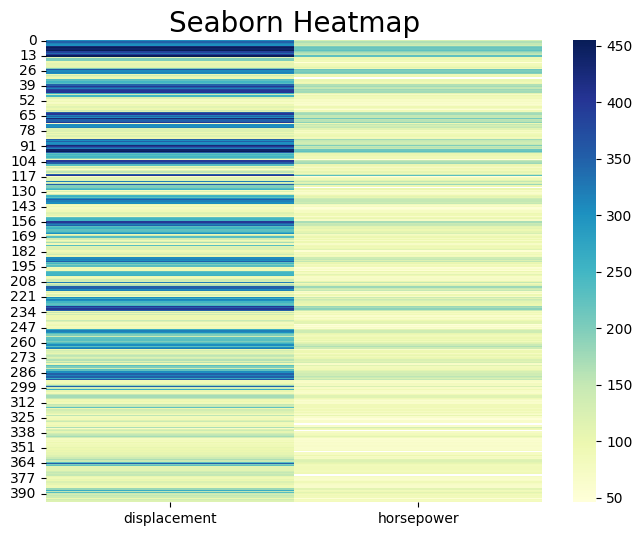

In [2]:
target = df.loc[:,['displacement','horsepower']]

plt.figure(figsize=(8,6))
sns.heatmap(target, cmap="YlGnBu")
plt.title('Seaborn Heatmap', fontsize=20)
plt.show() 

</p></br></br>


### Log-scaling Heatmap
---
히트맵은 제한된 색상으로 데이터를 표현하는 특성상, 만약 데이터의 분포가 넓은 편이라면 너무 크거나 작은 데이터가 색깔을 선점해 버려서 나머지 데이터가 제대로 구분되지 않는 경우가 생길 수 있습니다.  
</p></br></br>


이 때문에, 통계 분야에서는 시각화 등을 위해 데이터의 분포를 줄여주는 스케일링(scaling) 기법을 사용하는 편인데, 데이터의 크기가 너무 큰 값이 있다면 로그 스케일링(Log-scaling) 변환을 통해 너무 큰 값을 평균 수준에 가깝게 바꿔주는 편입니다.  
</p></br></br>


로그 스케일링의 경우, 다양한 패키지에서 제공하는 로그 변환 함수 또는 직접 로그 계산을 할 수 있으며 이번에는 Matplotlib에서 제공하는 `LogNorm` 을 이용해서 로그 변환을 해 보겠습니다.  
</p></br></br>



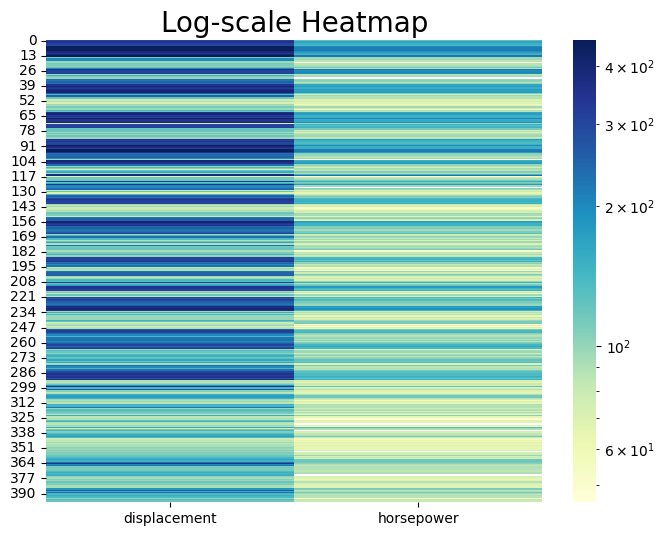

In [3]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(8,6))
sns.heatmap(target, cmap="YlGnBu", norm = LogNorm(vmin = target.min().min(), vmax = target.max().max()))
plt.title('Log-scale Heatmap', fontsize=20)

plt.show()

</p></br></br>


이렇게 Seaborn을 이용하면 간편하게 히트맵을 그려볼 수 있습니다. 개인적으로는 인터렉티브 플롯이 필요한 상황이 아니라면 Seaborn을 주로 사용하는 편이며, 많은 데이터 사이언티스트들이 애용하는 패키지이니 한번 배워 보시면 좋을겁니다.